Testing audio codes


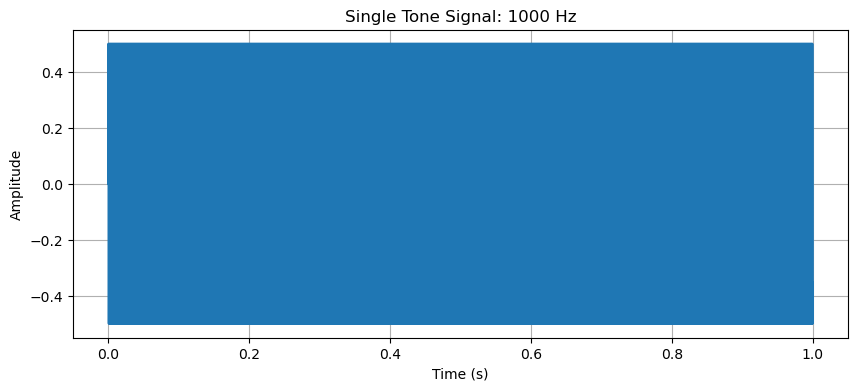

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

# Constants
sampling_rate = 8000  # Hz
duration = 1.0  # seconds
frequency = 1000  # Hz
amplitude = 0.5

# Generate the time values
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate the single tone signal
signal = amplitude * np.sin(2 * np.pi * frequency * t)

# Plot the signal
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.title(f"Single Tone Signal: {frequency} Hz")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

# Show the plot
plt.show()

# Playback the signal using sounddevice
sd.play(signal, sampling_rate)
sd.wait()


Line Collection

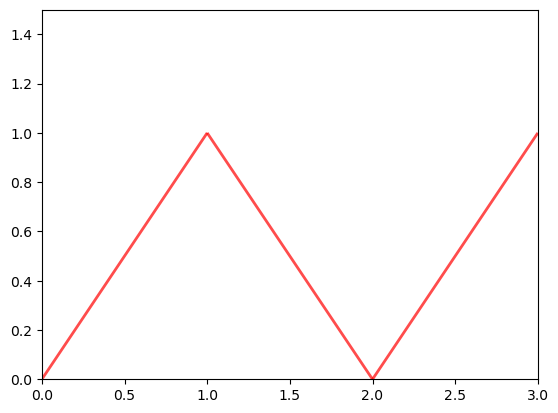

In [1]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

# Define line segment data
lines = [((0, 0), (1, 1)), ((1, 1), (2, 0)), ((2, 0), (3, 1))]

# Create a LineCollection
lc = LineCollection(lines, color='red', linewidth=2, alpha=0.7)

# Create a figure and axes
fig, ax = plt.subplots()

# Add the LineCollection to the axes
ax.add_collection(lc)

# Set axis limits
ax.set_xlim(0, 3)
ax.set_ylim(0, 1.5)

# Display the plot
plt.show()


Day 5 Rough

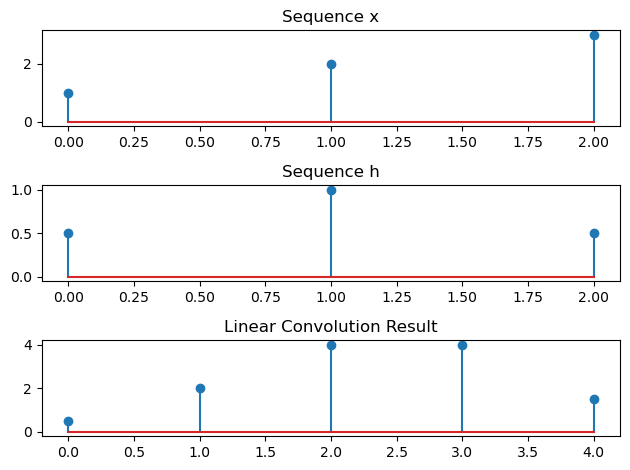

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def linear_convolution(x, h):
    return np.convolve(x, h, mode='full')

# Define two finite sequences
x = np.array([1, 2, 3])
h = np.array([0.5, 1, 0.5])

# Perform linear convolution
result = linear_convolution(x, h)

# Create time axis for plotting
n = np.arange(0, len(result))

# Plot the original sequences
plt.subplot(3, 1, 1)
plt.stem(np.arange(0, len(x)), x, use_line_collection=True)
plt.title("Sequence x")

plt.subplot(3, 1, 2)
plt.stem(np.arange(0, len(h)), h, use_line_collection=True)
plt.title("Sequence h")

# Plot the convolution result
plt.subplot(3, 1, 3)
plt.stem(n, result, use_line_collection=True)
plt.title("Linear Convolution Result")

plt.tight_layout()
plt.show()


x[n] sequence length : 500
x[n] sequence length : 21
input sequence : [0.34439146 0.85481666 0.73756348 0.19635359 0.66564183 0.5678651
 0.89771872 0.30529884 0.62533828 0.97646685 0.38488318 0.90875252
 0.7720198  0.49676063 0.71146003 0.71243094 0.86994972 0.12427707
 0.92955067 0.98891982 0.69239893 0.08425246 0.92059008 0.42537159
 0.78476422 0.5720112  0.19487385 0.31435519 0.48231694 0.19969101
 0.23611054 0.44961437 0.87925868 0.47804166 0.07901259 0.89344541
 0.74536041 0.13945113 0.53516115 0.21046249 0.42462198 0.23304315
 0.85859402 0.47546145 0.21073101 0.07600212 0.85418547 0.41606828
 0.0441547  0.85746135 0.72030938 0.0436644  0.00281905 0.20271172
 0.12404694 0.95141508 0.89508144 0.04311391 0.9219075  0.33905975
 0.16384931 0.16877486 0.14850964 0.13296311 0.570841   0.86055381
 0.07201934 0.24676729 0.62151493 0.67640465 0.03687913 0.17681192
 0.5244857  0.63656509 0.46733439 0.81739806 0.10338604 0.77178821
 0.16856971 0.28120456 0.70087809 0.8792945  0.16070656 0.12

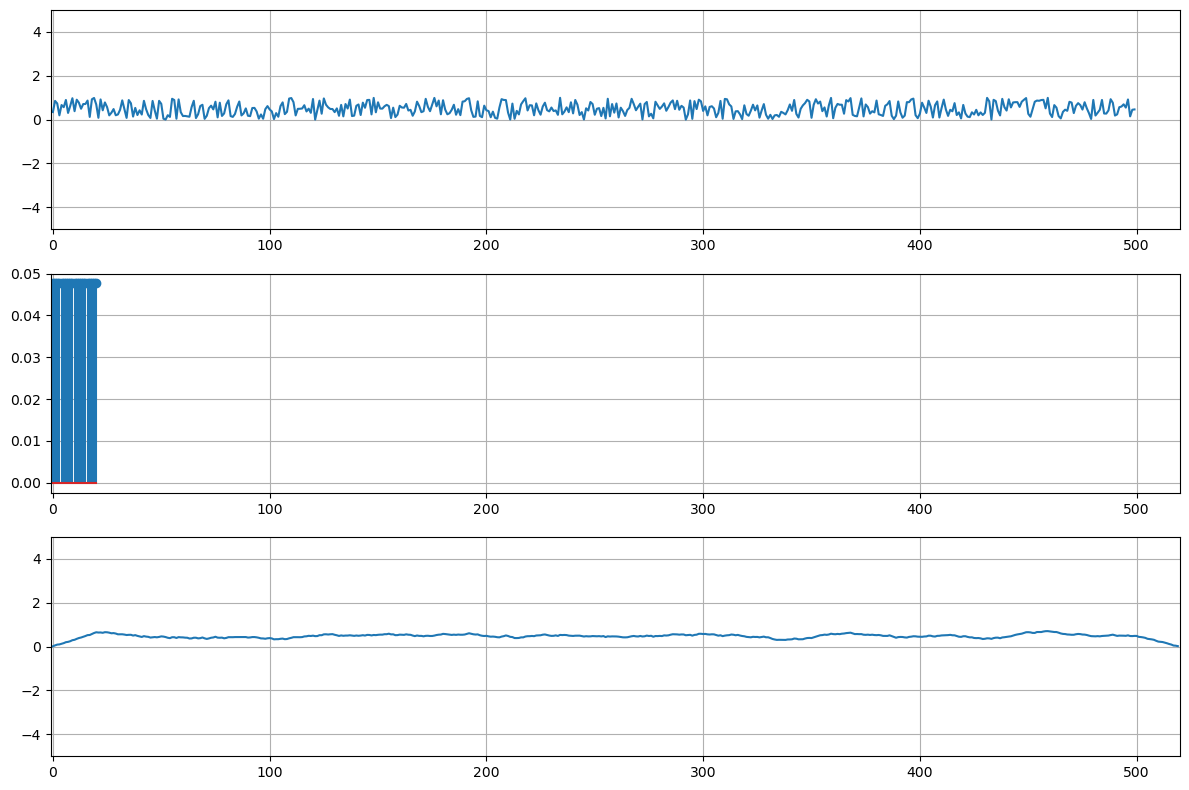

In [2]:
#Day 5
import numpy as np
import matplotlib.pyplot as plt

Ix = 0#4
Ih = 0#-1


#Linear Convolution
#x = np.array([1,0,-1,3,-2,2])
#h = np.array([1,-1,1])

x = np.random.rand(500)
h = np.ones(21)/21

Lx = x.size     #length of input response
Lh = h.size     #length of impulse response

print("x[n] sequence length : {}".format(Lx))
print("x[n] sequence length : {}".format(Lh))

Iy = Ix + Ih    #starting index of output response
Ly = Lx + Lh - 1  #length of output response

y = np.zeros(Ly) #initialising y array with zeros

for i in range(Lx):         #looping for creating output response y
    for j in range(Lh):
        y[i + j] += x[i]*h[j]

print("input sequence : {}".format(x))
print("IR sequence : {}".format(h))
print("Output sequence : {}".format(y))

nx = np.arange(Ix,Ix + Lx)      #bringing all the responses to equal sampling distance
nh = np.arange(Ih,Ih + Lh)
ny = np.arange(Iy,Iy + Ly)

plt.figure(figsize = (12,8))

plt.subplot(3,1,1)
plt.plot(nx,x)
plt.xlim([min(ny) - 1, max(ny) + 1])        #setting the limit for x-axis
plt.ylim([-5,5])
plt.grid()

plt.subplot(3,1,2)
plt.stem(nh,h)
plt.xlim([min(ny) - 1, max(ny) + 1])
plt.grid()

plt.subplot(3,1,3)
#plt.stem(ny,y)
plt.plot(ny,y)
plt.xlim([min(ny) - 1, max(ny) + 1])
plt.ylim([-5,5])
plt.grid()

plt.tight_layout()
plt.show()


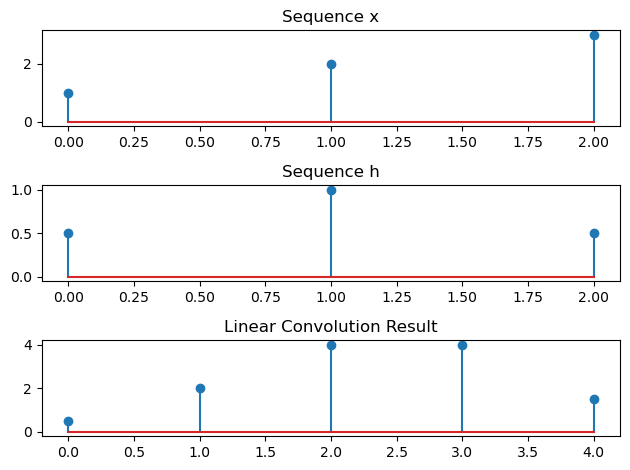

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def linear_convolution(x, h):
    M = len(x)
    N = len(h)
    L = M + N - 1

    result = np.zeros(L)

    for n in range(L):
        for k in range(max(0, n - N + 1), min(M, n + 1)):
            result[n] += x[k] * h[n - k]

    return result

# Define two finite sequences
x = np.array([1, 2, 3])
h = np.array([0.5, 1, 0.5])

# Perform linear convolution
result = linear_convolution(x, h)

# Create time axis for plotting
n = np.arange(0, len(result))

# Plot the original sequences
plt.subplot(3, 1, 1)
plt.stem(np.arange(0, len(x)), x, use_line_collection=True)
plt.title("Sequence x")

plt.subplot(3, 1, 2)
plt.stem(np.arange(0, len(h)), h, use_line_collection=True)
plt.title("Sequence h")

# Plot the convolution result
plt.subplot(3, 1, 3)
plt.stem(n, result, use_line_collection=True)
plt.title("Linear Convolution Result")

plt.tight_layout()
plt.show()


Input =  [ 1 -1  2 -1  3]
Impulse response =  [ 1 -1  1]
Output =  [ 1. -2.  4. -4.  6. -4.  3.]


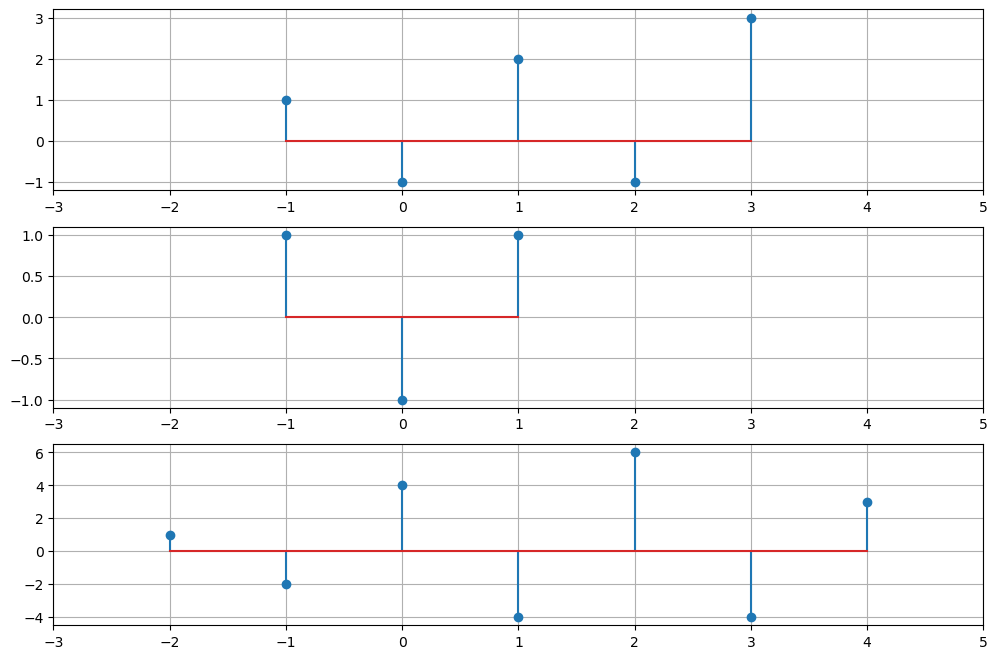

In [4]:
import numpy as np
import matplotlib.pyplot as plt
xn = np.array([1, -1, 2, -1, 3])
lx = xn.size
ix = -1
hn = np.array([1, -1, 1])
lh = hn.size
ih = -1
ly = lx + lh - 1
iy = ix + ih
yn = np.zeros(ly)
for i in range(lx):
    for j in range(lh):
        yn[i + j] += (xn[i]*hn[j])
print("Input = ",xn)
print("Impulse response = ",hn)
print("Output = ",yn)

nx = np.arange(ix,ix+lx)
nh = np.arange(ih,ih+lh)
ny = np.arange(iy,iy+ly)

plt.figure(figsize=(12,8))

plt.subplot(3, 1, 1)
plt.stem(nx, xn, label = "Input")
plt.xlim([min(ny)-1,max(ny)+1])
plt.grid()

plt.subplot(3, 1, 2)
plt.stem(nh, hn, label = "Impulse response")
plt.xlim([min(ny)-1,max(ny)+1])
plt.grid()

plt.subplot(3, 1, 3)
plt.stem(ny, yn, label = "Output")
plt.xlim([min(ny)-1,max(ny)+1])
plt.grid()

plt.show()